Phase 1 - Data Collection and Exploratory Data Analysis (EDA)

Step 1 - Data Collection and Preprocessing

In [241]:
# Importing the Libraires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_squared_error

In [242]:
df = pd.read_csv("employee_data.csv")
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [243]:

# Check missing values per column
print(df.isnull().sum())

EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64


In [244]:

# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


In [245]:
print(df['Attrition'].unique())  # Should only be ['Yes', 'No']
print(df['Department'].unique())  # Check for typos like 'engineering' vs 'Engineering'

['No' 'Yes']
['Sales' 'HR' 'Engineering' 'Marketing']


In [246]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB
None


In [247]:
# Drop irrelevant columns
df = df.drop(['Employee ID', 'Name'], axis=1, errors='ignore')


Step 2 - Exploratory Data Analysis (EDA)


Objective - Perform an initial analysis to understand the dataset and its key trends

In [248]:
# Calculating the Mean, Median, Mode, Standard Deviation and Variance
# Columns to analyze
cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']

# Mean
df_mean = {col: float(round(df[col].mean(), 2)) for col in cols}

# Median
df_median = {col: float(round(df[col].median(), 2)) for col in cols}

# Mode (handle multiple mode values by selecting the first one)
df_mode = {
    col: float(round(df[col].mode().iloc[0], 2)) if not df[col].mode().empty else None
    for col in cols
}

# Standard Deviation
df_std = {col: float(round(df[col].std(), 2)) for col in cols}

# Variance
df_var = {col: float(round(df[col].var(), 2)) for col in cols}

# Print Results
print("Mean:", df_mean)
print("Median:", df_median)
print("Mode:", df_mode)
print("Standard Deviation:", df_std)
print("Variance:", df_var)

Mean: {'Age': 36.57, 'Salary': 72820.0, 'YearsAtCompany': 10.8, 'PerformanceScore': 84.94}
Median: {'Age': 35.0, 'Salary': 72000.0, 'YearsAtCompany': 10.0, 'PerformanceScore': 85.5}
Mode: {'Age': 29.0, 'Salary': 68000.0, 'YearsAtCompany': 2.0, 'PerformanceScore': 80.0}
Standard Deviation: {'Age': 8.32, 'Salary': 12643.82, 'YearsAtCompany': 6.36, 'PerformanceScore': 6.35}
Variance: {'Age': 69.2, 'Salary': 159866262.63, 'YearsAtCompany': 40.46, 'PerformanceScore': 40.32}


In [249]:
# Calculating the correlation using the Karl Pearson Method
corr = df[cols].corr()
corr

,Age,Salary,YearsAtCompany,PerformanceScore
Age,1.000000,0.281416,0.946127,0.305288
Salary,0.281416,1.000000,0.413361,0.874773
YearsAtCompany,0.946127,0.413361,1.000000,0.443331
PerformanceScore,0.305288,0.874773,0.443331,1.000000


<Axes: >

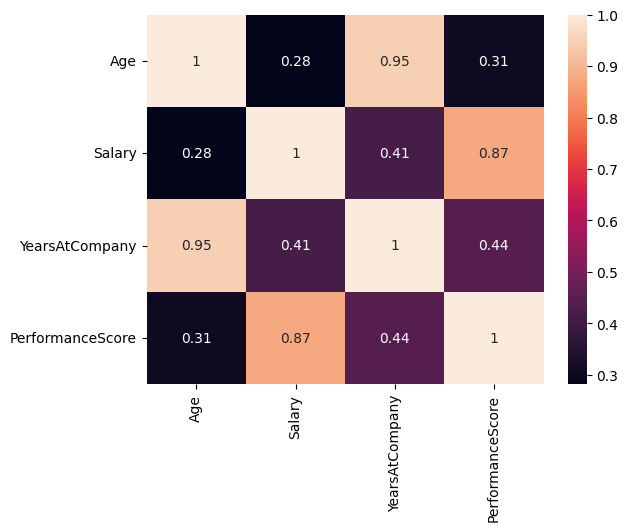

In [250]:
# Visualizing Dataset
sns.heatmap(corr, annot=True)

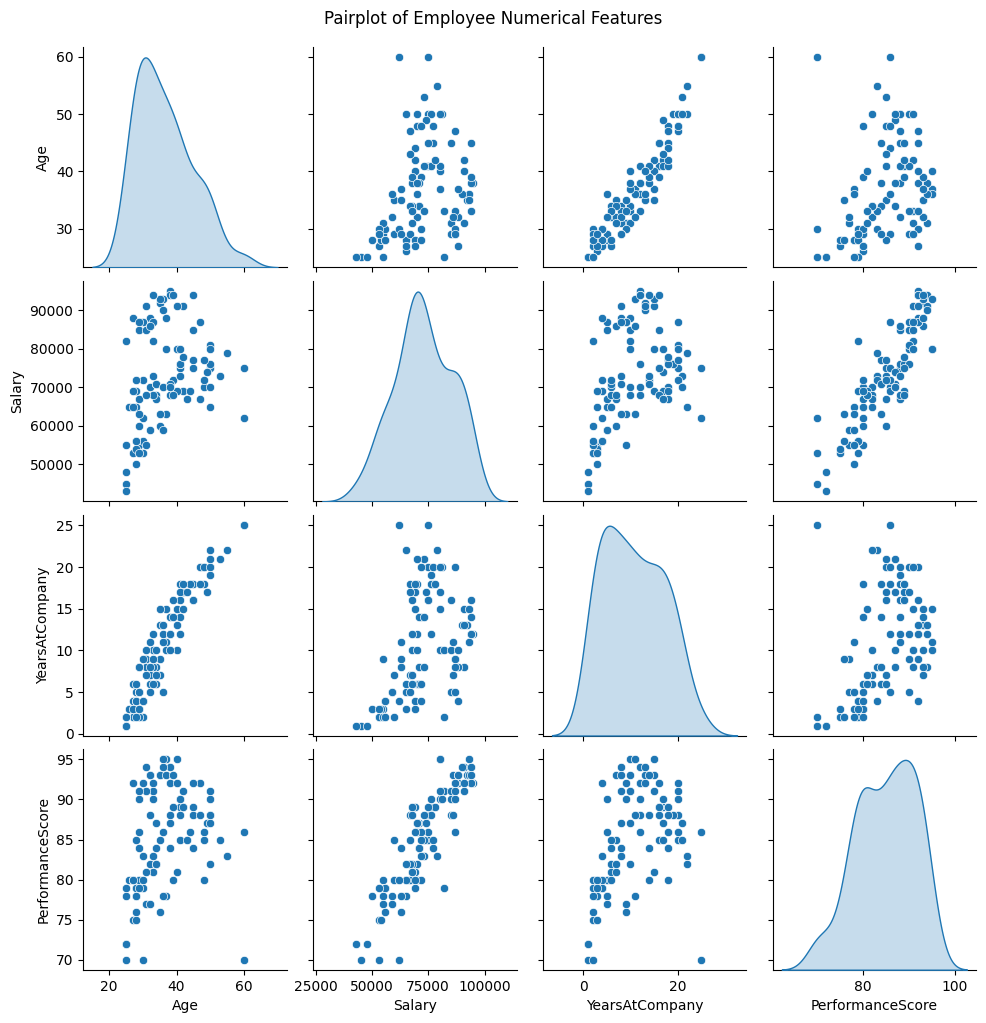

In [251]:
sns.pairplot(df[cols], diag_kind='kde')
plt.suptitle("Pairplot of Employee Numerical Features", y=1.02)
plt.show()

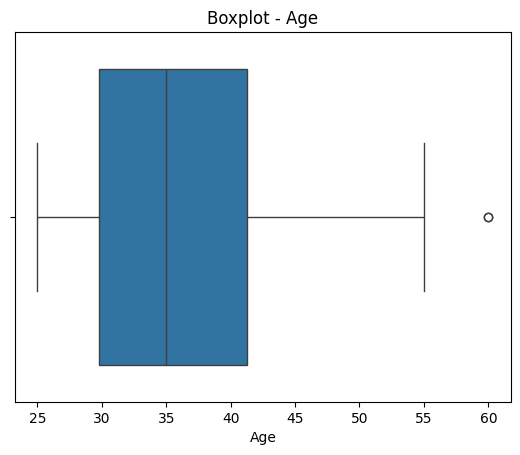

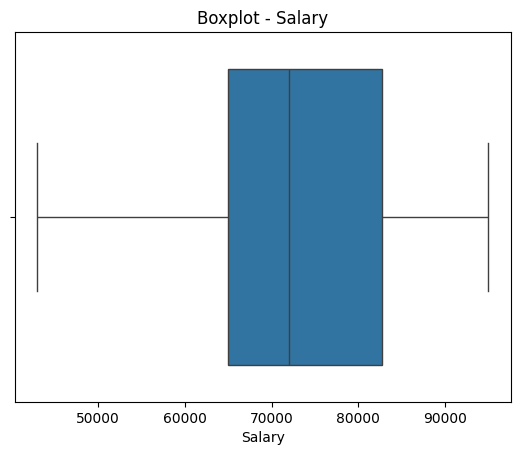

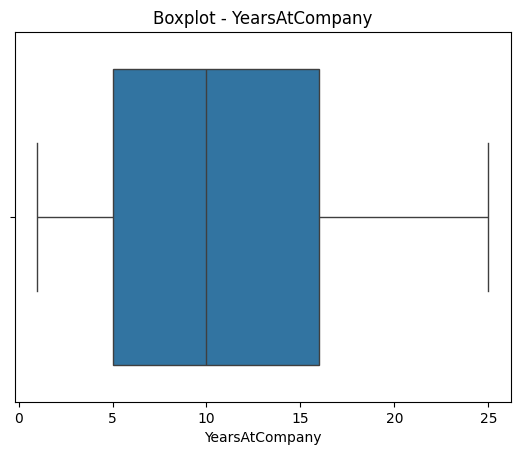

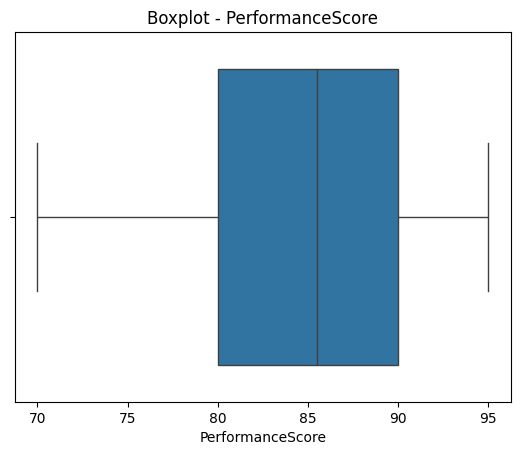

In [252]:
for col in cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()

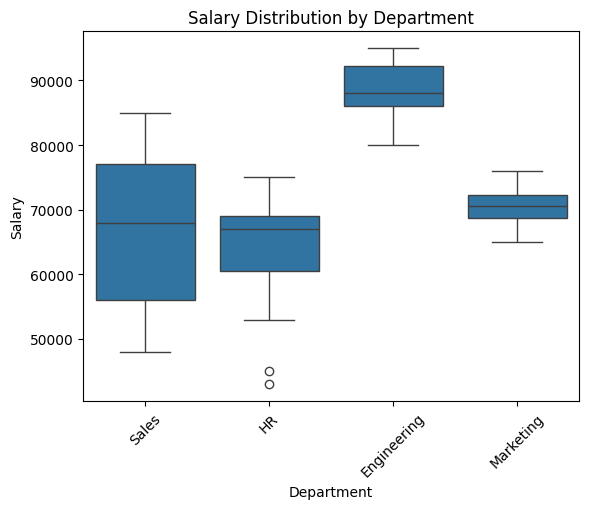

In [253]:
sns.boxplot(x='Department', y='Salary', data=df)
plt.title("Salary Distribution by Department")
plt.xticks(rotation=45)
plt.show()

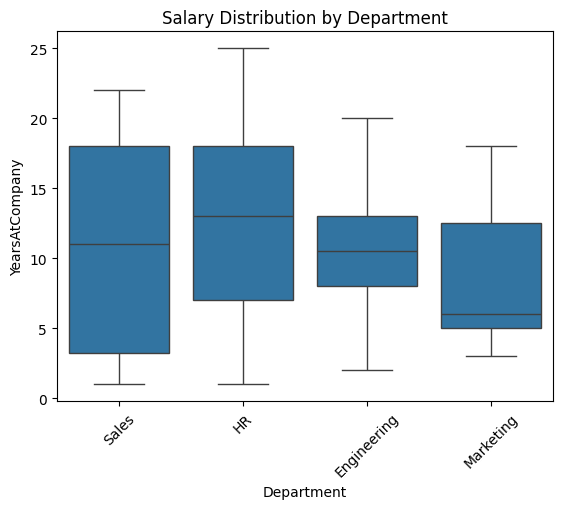

In [254]:
sns.boxplot(x='Department', y='YearsAtCompany', data=df)
plt.title("Salary Distribution by Department")
plt.xticks(rotation=45)
plt.show()

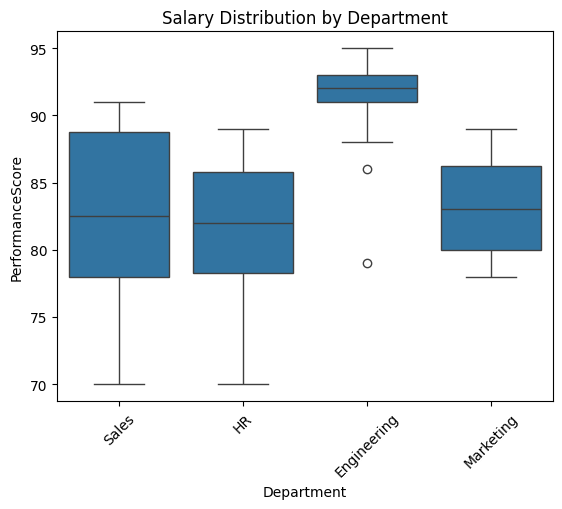

In [255]:
sns.boxplot(x='Department', y='PerformanceScore', data=df)
plt.title("Salary Distribution by Department")
plt.xticks(rotation=45)
plt.show()

Step 3 - Probability and Statistical Analysis

In [256]:
# 1. PROBABILITY (Observed)

# Group-wise probability of attrition by Department
attrition_by_dept = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean())
attrition_by_dept_percent = (attrition_by_dept * 100).round(2).astype(str) + '%'

# Group-wise probability of attrition by rounded Performance Score
df['PerfGroup'] = df['PerformanceScore'].round()
attrition_by_perf = df.groupby('PerfGroup')['Attrition'].apply(lambda x: (x == 'Yes').mean())
attrition_by_perf_percent = (attrition_by_perf * 100).round(2).astype(str) + '%'

print("Probability of Attrition by Department:")
print(attrition_by_dept_percent, end="\n\n")

print("Probability of Attrition by Performance Score:")
print(attrition_by_perf_percent, end="\n\n")

# 2. BAYES' THEOREM

# Example for Performance Score = 7
target_score = 7
p_attrition = (df['Attrition'] == 'Yes').mean()  # P(A)
p_perf_given_attr = df[df['Attrition'] == 'Yes']['PerfGroup'].value_counts(normalize=True).get(target_score, 0)  # P(B|A)
p_perf = (df['PerfGroup'] == target_score).mean()  # P(B)

# Bayes' Theorem
if p_perf > 0:
    p_attrition_given_perf = (p_perf_given_attr * p_attrition) / p_perf
    print(f"P(Attrition | Performance Score = {target_score}) using Bayes Theorem: {round(p_attrition_given_perf*100, 2)}%")
else:
    print(f"No employees with Performance Score = {target_score} found.")

print()

# 3. HYPOTHESIS TESTING (ANOVA) Since there more than 2 departments.

# Preparing data for ANOVA
departments = df['Department'].unique()
scores_by_dept = [df[df['Department'] == dept]['PerformanceScore'] for dept in departments]

# Running one-way ANOVA
f_stat, p_val = f_oneway(*scores_by_dept)

print("Test for Mean Performance Score across Departments:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject the null hypothesis: Performance scores differ across departments.")
else:
    print("Fail to reject the null hypothesis: No significant difference in performance scores across departments.")

Probability of Attrition by Department:
Department
Engineering    42.86%
HR             34.62%
Marketing       20.0%
Sales          53.85%
Name: Attrition, dtype: object

Probability of Attrition by Performance Score:
PerfGroup
70    33.33%
72      0.0%
75     50.0%
76      0.0%
77     50.0%
78     60.0%
79     20.0%
80    11.11%
81    66.67%
82      0.0%
83    33.33%
84     50.0%
85     50.0%
86     40.0%
87     75.0%
88    42.86%
89     40.0%
90     20.0%
91     40.0%
92    57.14%
93    66.67%
94    33.33%
95    33.33%
Name: Attrition, dtype: object

No employees with Performance Score = 7 found.

Test for Mean Performance Score across Departments:
F-statistic: 25.7811
P-value: 0.0000
Reject the null hypothesis: Performance scores differ across departments.


Phase 2 - Predictive Modeling

Step 4 - Feature Engineering and Encoding

In [257]:
# Only required for models that need scaling
scaler = StandardScaler()
scaled_features = df.copy()

# already done this cols = ['Age', 'Salary', 'Years at Company', 'Performance Score']
scaled_features[cols] = scaler.fit_transform(df[cols])

# Preview processed data
scaled_features.head()

,EmployeeID,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition,PerfGroup
0,1,-0.914607,Sales,-1.416484,-1.232364,-0.781900,No,80
1,2,-0.189687,HR,-1.019042,-0.600383,0.009497,No,85
2,3,0.414412,Engineering,0.570727,-0.126396,1.592290,Yes,95
3,4,-1.035427,Marketing,-0.621600,-0.916373,-1.098459,No,78
4,5,1.622612,Sales,0.173285,1.453558,0.484335,Yes,88


In [258]:
# Encoding target variable 'Attrition' (Yes/No -> 1/0)
le_attrition = LabelEncoder()
df['Attrition'] = le_attrition.fit_transform(df['Attrition'])

# One-hot encoding 'Department' column
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

Step - 5 Employee Attrition Prediction Model

In [259]:
df.head()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore,Attrition,PerfGroup,Department_HR,Department_Marketing,Department_Sales
0,1,29,55000,3,80,0,80,False,False,True
1,2,35,60000,7,85,0,85,True,False,False
2,3,40,80000,10,95,1,95,False,False,False
3,4,28,65000,5,78,0,78,False,True,False
4,5,50,75000,20,88,1,88,False,False,True


Accuracy: 0.6
Precision: 0.4444444444444444
Recall: 0.5714285714285714
F1-Score: 0.5


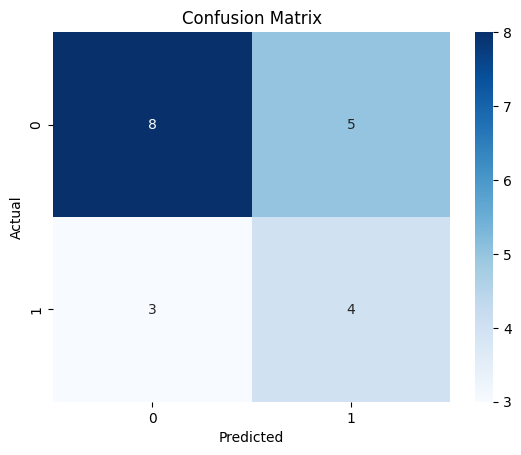

In [260]:
# Defining features and target
X = df.drop(['Attrition'], axis=1, errors='ignore')  # drop non-numeric or irrelevant columns
y = df['Attrition']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Training model
rf_clf.fit(X_train, y_train)

# Predicting on test set
y_pred = rf_clf.predict(X_test)

# Evaluating
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Step 6 - Employee Performance Prediction Model

In [261]:

df.head()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore,Attrition,PerfGroup,Department_HR,Department_Marketing,Department_Sales
0,1,29,55000,3,80,0,80,False,False,True
1,2,35,60000,7,85,0,85,True,False,False
2,3,40,80000,10,95,1,95,False,False,False
3,4,28,65000,5,78,0,78,False,True,False
4,5,50,75000,20,88,1,88,False,False,True


R-squared (R²): 1.0
Mean Squared Error (MSE): 1.0097419586828951e-28


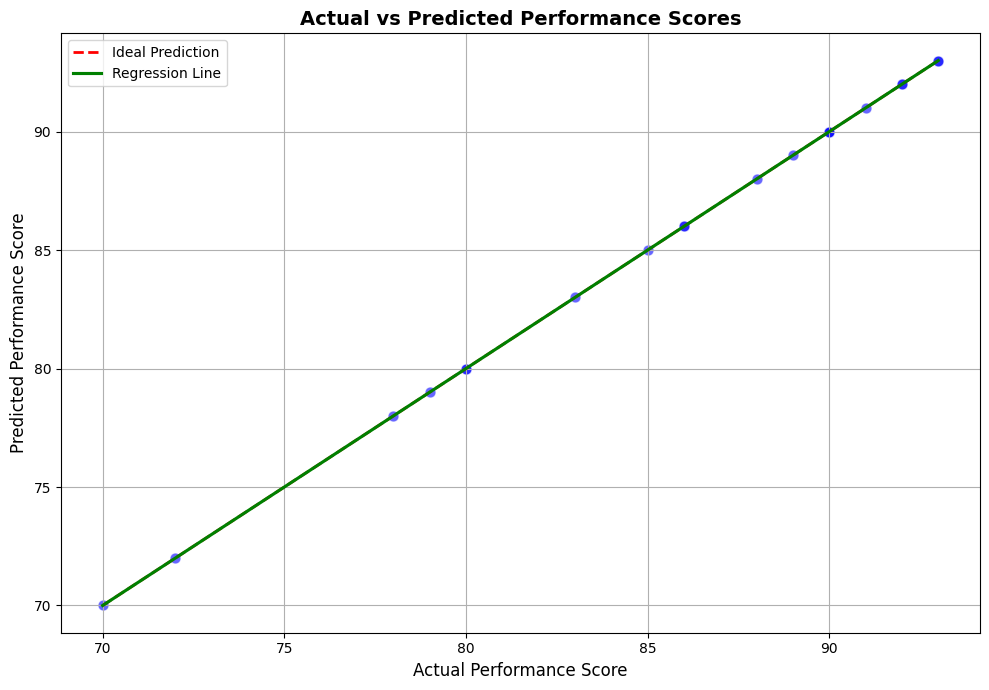

In [262]:
# Defining features and target
X = df.drop(['PerformanceScore'], axis=1, errors='ignore')  # drop non-numeric or irrelevant columns
y = df['PerformanceScore']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initializing Random Forest
lr_clf = LinearRegression()

# Training model
lr_clf.fit(X_train, y_train)

# Predicting on test set
y_pred = lr_clf.predict(X_test)

# Evaluating
print("R-squared (R²):", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

# Visualizing
# Scatter plot with density, regression, and error lines
plt.figure(figsize=(10, 7))

# Scatter points
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", s=60, edgecolor='w')

# Identity line (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Prediction')

# Trend line (actual model fit)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='green', label='Regression Line')

# Titles and labels
plt.xlabel("Actual Performance Score", fontsize=12)
plt.ylabel("Predicted Performance Score", fontsize=12)
plt.title("Actual vs Predicted Performance Scores", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Phase 3 - Deep Learning Models

Step 7 - Deep Learning for Employee Performance Prediction

In [263]:

df.head()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore,Attrition,PerfGroup,Department_HR,Department_Marketing,Department_Sales
0,1,29,55000,3,80,0,80,False,False,True
1,2,35,60000,7,85,0,85,True,False,False
2,3,40,80000,10,95,1,95,False,False,False
3,4,28,65000,5,78,0,78,False,True,False
4,5,50,75000,20,88,1,88,False,False,True


In [264]:
# Defining features and target
X = df.drop(columns=["PerformanceScore"], errors='ignore')
y = df["PerformanceScore"]

# Scaling numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Defining the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Prediction and evaluation
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Epoch 1/100


c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 7212.8315 - val_loss: 7117.5059
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7170.3379 - val_loss: 7083.0371
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7130.4229 - val_loss: 7048.5405
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7089.5835 - val_loss: 7013.0117
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7045.3330 - val_loss: 6975.0791
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7001.0557 - val_loss: 6934.9434
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6952.0742 - val_loss: 6891.6816
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6898.6943 - val_loss: 6844.4395
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6841.2236 - val_loss: 6793.4399
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6775.9146 - val_loss: 6736.8135
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6704.6641 - val_loss: 6673.8682
Epoch 12/100
4/4 ━━━


Step 8 - Employee Attrition Analysis with Deep Learning

In [265]:

df.head()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore,Attrition,PerfGroup,Department_HR,Department_Marketing,Department_Sales
0,1,29,55000,3,80,0,80,False,False,True
1,2,35,60000,7,85,0,85,True,False,False
2,3,40,80000,10,95,1,95,False,False,False
3,4,28,65000,5,78,0,78,False,True,False
4,5,50,75000,20,88,1,88,False,False,True


In [266]:
# Defining features and target
X = df.drop(columns=["Attrition"], errors='ignore')
y = df["Attrition"]

# Scaling numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Defining the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Prediction on test set
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Printing metrics
print(f"\nModel Evaluation Metrics:")
print(f"Accuracy :  {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall   :  {recall:.4f}")
print(f"F1-Score :  {f1:.4f}")

Epoch 1/50


c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3750 - loss: 0.7501 - val_accuracy: 0.5000 - val_loss: 0.7632
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4375 - loss: 0.7108 - val_accuracy: 0.3750 - val_loss: 0.7410
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5469 - loss: 0.6794 - val_accuracy: 0.4375 - val_loss: 0.7231
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5938 - loss: 0.6544 - val_accuracy: 0.5625 - val_loss: 0.7101
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6875 - loss: 0.6347 - val_accuracy: 0.5625 - val_loss: 0.7014
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7344 - loss: 0.6195 - val_accuracy: 0.6250 - val_loss: 0.6922
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7344 - loss: 0.6076 - val_accuracy: 0.6250 - val_loss: 0.6851
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.5971 - val_accuracy: 0.6250 - val_loss: 0.6804
Epoch 9/50


Phase 4 - Reporting and Insights

Step 9 - Insights and Recommendations

Key Findings:
1. Performance Score Variance: The ANOVA test indicated a significant difference in mean performance scores across different departments. This suggests that departmental factors play a role in employee performance.
2. Attrition Probability: The observed probability of attrition varied across departments and performance score groups. Some departments and performance score ranges have a higher likelihood of employees leaving.
3. Predictive Model Insights:
>The Random Forest model for attrition prediction provides insight into features that are important for predicting whether an employee will leave.
>The Linear Regression and Deep Learning models for performance prediction indicate the extent to which various features explain and predict an employee's performance score.

Recommendations:
1. Department-Specific Interventions: Given the difference in performance scores across departments and varying attrition rates, tailor strategies to specific departments.
>Performance Improvement Plans: For departments with lower average performance scores, investigate underlying causes. This could involve reviewing training programs, management effectiveness, workload distribution, or resource availability. Implement targeted performance improvement plans for these departments.
>Retention Strategies: Identify departments with high attrition probability. Conduct exit interviews to understand the reasons for leaving and implement retention strategies specific to those departments. This might include addressing compensation, work-life balance, career development opportunities, or company culture.
2. Targeted Employee Engagement Programs: Based on the analysis of attrition by performance score, focus on employee engagement programs that address the needs of employees in high-risk performance groups. For example, if employees with certain performance scores are more likely to leave, explore ways to improve their engagement, recognition, or support.


Step 10 - Data Visualization and Reporting

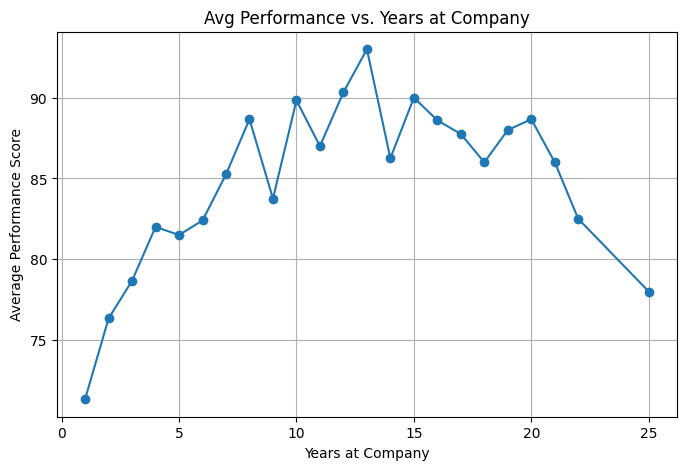

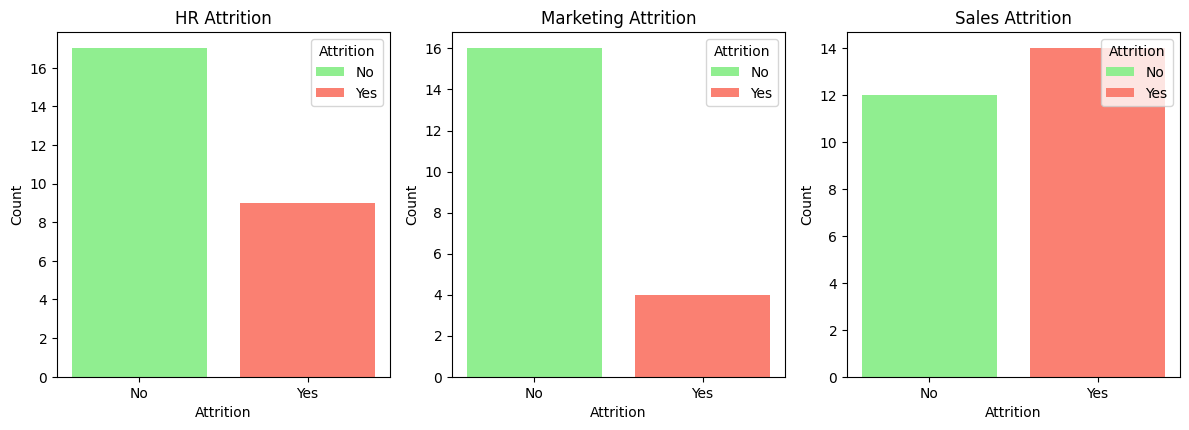

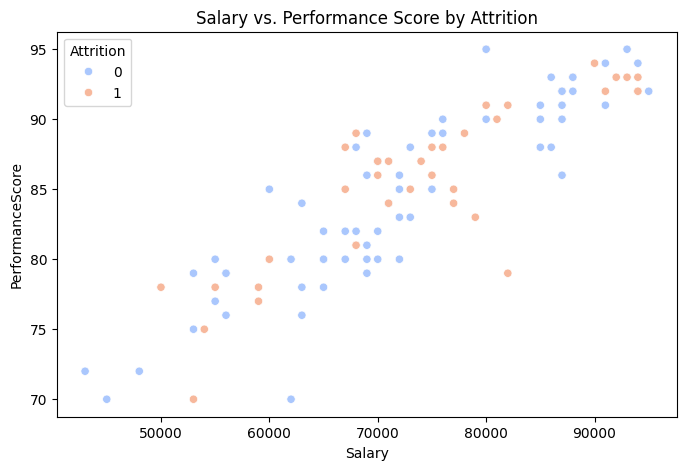

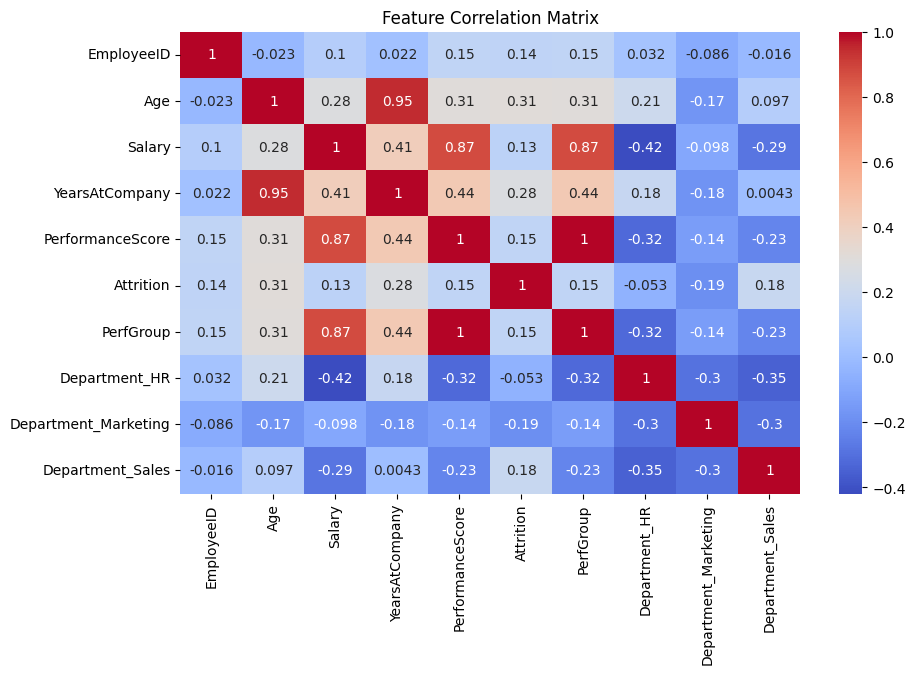

In [267]:
# Line Plot: Average Performance Score by Years at Company
plt.figure(figsize=(8,5))
df.groupby("YearsAtCompany")["PerformanceScore"].mean().plot(marker='o')
plt.title("Avg Performance vs. Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Average Performance Score")
plt.grid(True)
plt.show()

# List of one-hot encoded department columns
departments = ['Department_HR','Department_Marketing', 'Department_Sales']

# Creating subplots
plt.figure(figsize=(12, 8))

for i, dept in enumerate(departments, 1):
    plt.subplot(2, 3, i)

    # Filtering data for this department
    dept_df = df[df[dept] == 1]

    # Counting 0 (No) and 1 (Yes) in Attrition column
    counts = dept_df['Attrition'].value_counts().sort_index()

    # Creating bar plot
    bars = plt.bar(['No', 'Yes'], counts.values, color=['lightgreen', 'salmon'])

    # Title and labels
    plt.title(dept.replace('Department_', '') + ' Attrition')
    plt.xlabel('Attrition')
    plt.ylabel('Count')

    # Legend
    plt.legend(bars, ['No', 'Yes'], title="Attrition")

plt.tight_layout()
plt.show()
# Scatter Plot: Salary vs. Performance Score
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Salary", y="PerformanceScore", hue="Attrition", palette='coolwarm')
plt.title("Salary vs. Performance Score by Attrition")
plt.show()

# Heatmap: Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [268]:
df['Attrition'].value_counts()

Attrition
0    61
1    39
Name: count, dtype: int64